In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
import scipy
import scipy.stats
import scipy.integrate

# Thème 3 : Analyse Bayésienne

## Jeu du pile ou face

On souhaite estimer, à partir d'un série de N mesures au jeu de pile ou face, la probabilité $p$ d'obtenir pile.
Pour cela, dans le cadre de l'analyse bayésienne on va considérer $p$ comme une variable aléatoire et on va construire sa fonction densité de probabilité à l'aide du théorème de Bayes~(on suppose que l'on a observé n piles parmi les N mesures):

$$ f_N(p|n) \propto P_N(n|p) \times \pi (p) $$

où $f_N(p|n)$ est la fonction de distribution associée à $p$, $P_N(n|p)$ est la probabilité d'observer $n$ piles
parmi $N$ mesures pour un $p$ donné (fonction de vraisemblance) et $\pi(p)$ est la fonction densité de
probabilité associée à $p$ à priori (ce que l'on appelle le prior).

1. Donner la forme de $P_N(n|p)$.


 La probabilité d'avoir n piles sachant la valeur de p est donné par une loi binomiale.
 
 $P_N(n|p) = \prod_{i = 1}^{x} P_N(n|p_{i}) = \prod_{i = 1}^{x}{n \choose k} p_{i}^k (1-p_{i})^{n-k}$
 
 $P_N(n|p) = {n \choose k} p^k (1-p)^{n-k}$

2. Simuler une série de $128$ mesures effectuées avec $p=.8$ et stocker les résultats dans un vecteur.


In [2]:
#Là on simule PN(n|p) car on a N = 128 lancés, et on connaît p=0.8. 

r = np.random.random(128)<=0.8
n = np.sum(r)
print('Nombre de piles =',n)

print(scipy.special.binom(4,2))

x = np.linspace(0,3,100)
y = x

print(scipy.integrate.simps(y, x))
    

Nombre de piles = 96
6.0
4.5



Dans la suite, on prend comme prior $\pi (p) = 1$ (toutes les valeurs de $p$ sont équiprobables).

3. Représenter $f_{N}(p|n)$ pour N = 1, 2, 4, 8, 16, 32, 64, 128. On prendra soin de normaliser la fonction densité
de probabilité (on peut utiliser la méthode `scipy.integrate.simps` pour intégrer numériquement
une fonction entre $a$ et $b$). 



fN(p|n), c est la probabilité d avoir p, sachant que l on a obtenu n piles pour N lancés.


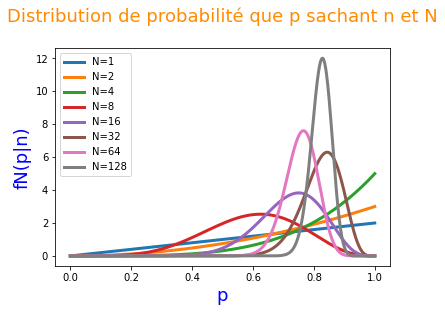

In [3]:
# On crée un vecteur avec 128 lancés, dont les piles représenteront tous les nombres aléatoires en dessous de 0.8.


# On fait fluctuer le nombre de lancés, et donc le nombre de piles (n)
# Et après on prend un p, une probabilité continue, (donc plus fixée à 0.8)
# Et on la rend continue, et y nous donne la probabilité d'avoir un certain nombre de pile, 
# à partir d'une probabilité '' moyenne '' déjà définie qui ici est 0.8.

for N in [2**i for i in range(8)]:
    r = np.random.random(128)<=0.8
    p = np.linspace(0, 1, 1000)
    #On fait la somme des true sur les N premières composantes de r qui viennent d'être générées.
    n = np.sum(r[:N])
    # Loi binomiale donne la probabilité d'avoir n succès ... il manque quand même (n parmis N):
    # Comme p est continu, on calcule plus de y puisqu'il y a pleinn de p ?
    # J'ai rajouté le coefficient binomial ..
    y = scipy.special.binom(N,n)*p**n*(1-p)**(N-n)
    #print(p[np.argmax(y)])
    #print('\n', np.var(p))
    # Là il intègre juste l'aire en dessous de la courbe.
    norm = scipy.integrate.simps(y, p)
    plt.plot(p, y/norm, label=f'N={N}', lw = 3) 
    plt.legend()
    

class color:
   PURPLE = '\033[95m'
   BOLD = '\033[1m'
   END = '\033[0m'

print(color.PURPLE + color.BOLD +'\nfN(p|n), c est la probabilité d avoir p, sachant que l on a obtenu n piles pour N lancés.'+ color.END)


plt.xlabel('p', fontsize =18, color = 'b')
plt.ylabel('fN(p|n)', fontsize =18, color = 'b')
plt.title('Distribution de probabilité que p sachant n et N\n', fontsize = 18, color='darkorange')
plt.show()



4. Pour chaque cas, en déduire la valeur la plus probable de $p$ : $p_{MV}$ (on peut utiliser la fonction `np.argmax`), comparer à la valeur théorique. Calculer la variance $\sigma^2$ de $p$.


In [27]:
def gaussian(x, mu, sig):
    return 1./(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)

for N in [2**i for i in range(8)]:
    
    r = np.random.random(1000)<=0.8
    p = np.linspace(0, 1, 10000)
    n = np.sum(r[:N])
   
    y = scipy.special.binom(N,n)*p**n*(1-p)**(N-n)
    norm = scipy.integrate.simps(y, p)
    popt,pcov = scipy.optimize.curve_fit(gaussian,p, y/norm)

    print('\nNombre de lancés :', N)
    print('Valeur la plus probable de p :',np.round(p[np.argmax(y/norm)],4))
    print('Variance de la distribution de p :', np.round(popt[1]**2,4))
    print('Ecart à la valeur théorique de p :', np.round(abs(0.8-p[np.argmax(y/norm)]),4))
 
print('\nPlus N est grand, plus on tend vers pmv = 0.8, qui est la valeur théorique, et plus la variance diminue, ce qui indique'
      ' que la distribution de p est d autant plus piquée autour de cette valeur.')
print('\nfN(p|n), c est la probabilité d avoir p, sachant que l on a obtenu n piles pour N lancés')



Nombre de lancés : 1
Valeur la plus probable de p : 1.0
Variance de la distribution de p : 0.0659
Ecart à la valeur théorique de p : 0.2

Nombre de lancés : 2
Valeur la plus probable de p : 1.0
Variance de la distribution de p : 0.0327
Ecart à la valeur théorique de p : 0.2

Nombre de lancés : 4
Valeur la plus probable de p : 1.0
Variance de la distribution de p : 0.0125
Ecart à la valeur théorique de p : 0.2

Nombre de lancés : 8
Valeur la plus probable de p : 0.75
Variance de la distribution de p : 0.0202
Ecart à la valeur théorique de p : 0.05

Nombre de lancés : 16
Valeur la plus probable de p : 0.75
Variance de la distribution de p : 0.0107
Ecart à la valeur théorique de p : 0.05

Nombre de lancés : 32
Valeur la plus probable de p : 0.75
Variance de la distribution de p : 0.0056
Ecart à la valeur théorique de p : 0.05

Nombre de lancés : 64
Valeur la plus probable de p : 0.8125
Variance de la distribution de p : 0.0023
Ecart à la valeur théorique de p : 0.0125

Nombre de lancés :

5. En déduire le niveau de confiance associé à l'intervalle $[ p_{MV}-\sigma, p_{MV}+\sigma ]$.

In [6]:
#Demander à Mr Derome.

6. Comment évoluent les  résultats obtenus si on prend un autre prior ? essayer par exemple $\pi (p) = 2 p$ ou
 $\pi (p) = 3 p^2$.

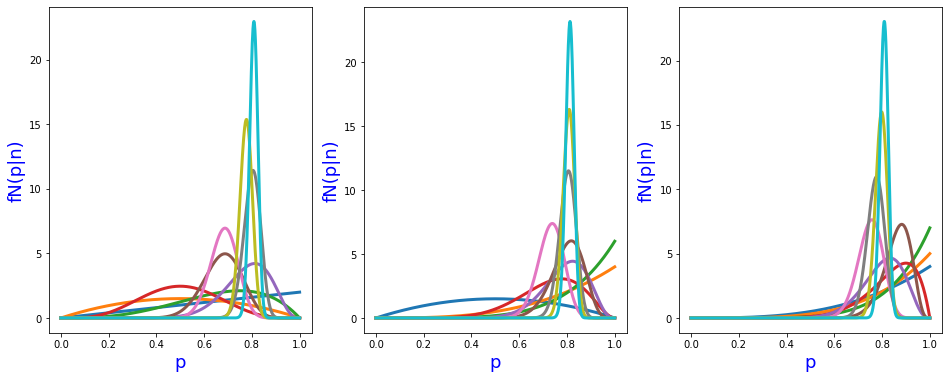

In [7]:

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,6))

for N in [2**i for i in range(10)]:
    r = np.random.random(1000)<=0.8
    p = np.linspace(0, 1, 1000)
    n = np.sum(r[:N])
    y = scipy.special.binom(N,n)*p**n*(1-p)**(N-n)
    norm = scipy.integrate.simps(y, p)
    ax1.plot(p, y/norm, label=f'N={N}', lw = 3) 
    ax1.set_xlabel('p', fontsize =18, color = 'b')
    ax1.set_ylabel('fN(p|n)', fontsize =18, color = 'b')

for N in [2**i for i in range(10)]:
    r = np.random.random(1000)<=0.8
    p = np.linspace(0, 1, 1000)
    n = np.sum(r[:N])
    y = scipy.special.binom(N,n)*p**n*(1-p)**(N-n)*2*p
    norm = scipy.integrate.simps(y, p)
    ax2.plot(p, y/norm, label=f'N={N}', lw = 3)
    ax2.set_xlabel('p', fontsize =18, color = 'b')
    ax2.set_ylabel('fN(p|n)', fontsize =18, color = 'b')

for N in [2**i for i in range(10)]:
    r = np.random.random(1000)<=0.8
    p = np.linspace(0, 1, 1000)
    n = np.sum(r[:N])
    y = scipy.special.binom(N,n)*p**n*(1-p)**(N-n)*3*p**2
    norm = scipy.integrate.simps(y, p)
    ax3.plot(p, y/norm, label=f'N={N}', lw = 3)
    ax3.set_xlabel('p', fontsize =18, color = 'b')
    ax3.set_ylabel('fN(p|n)', fontsize =18, color = 'b')

    
plt.show()


In [30]:

print('\n                                      Pour prior = 2p :\n')

def gaussian(x, mu, sig):
    return 1./(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)


for N in [2**i for i in range(8)]:
    r = np.random.random(128)<=0.8
    n = np.sum(r[:N])
    p = np.linspace(0, 1, 1000)
    y = scipy.special.binom(N,n)*p**(n)*(1-p)**(N-n)*2*p
    norm = scipy.integrate.simps(y, p)
    popt,pcov = scipy.optimize.curve_fit(gaussian,p, y/norm)

    print('\nNombre de lancés :', N)
    print('Valeur la plus probable de p :',np.round(p[np.argmax(y/norm)],4))
    print('Variance de la distribution de p :', np.round(popt[1]**2,4))
    print('Ecart à la valeur théorique de p :', np.round(abs(0.8-p[np.argmax(y/norm)]),4))



                                      Pour prior = 2p :


Nombre de lancés : 1
Valeur la plus probable de p : 0.4995
Variance de la distribution de p : 0.0671
Ecart à la valeur théorique de p : 0.3005

Nombre de lancés : 2
Valeur la plus probable de p : 1.0
Variance de la distribution de p : 0.0191
Ecart à la valeur théorique de p : 0.2

Nombre de lancés : 4
Valeur la plus probable de p : 0.7998
Variance de la distribution de p : 0.0279
Ecart à la valeur théorique de p : 0.0002

Nombre de lancés : 8
Valeur la plus probable de p : 0.7778
Variance de la distribution de p : 0.0171
Ecart à la valeur théorique de p : 0.0222

Nombre de lancés : 16
Valeur la plus probable de p : 0.8819
Variance de la distribution de p : 0.0061
Ecart à la valeur théorique de p : 0.0819

Nombre de lancés : 32
Valeur la plus probable de p : 0.7578
Variance de la distribution de p : 0.0053
Ecart à la valeur théorique de p : 0.0422

Nombre de lancés : 64
Valeur la plus probable de p : 0.8619
Variance de la distri

In [31]:
print('\n                                      Pour prior = 3p² :\n')

def gaussian(x, mu, sig):
    return 1./(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)


for N in [2**i for i in range(8)]:
    r = np.random.random(128)<=0.8
    n = np.sum(r[:N])
    p = np.linspace(0, 1, 1000)
    y = scipy.special.binom(N,n)*p**(n)*(1-p)**(N-n)*3*p**2
    norm = scipy.integrate.simps(y, p)
    popt,pcov = scipy.optimize.curve_fit(gaussian,p, y/norm)

    print('\nNombre de lancés :', N)
    print('Valeur la plus probable de p :',np.round(p[np.argmax(y/norm)],4))
    print('Variance de la distribution de p :', np.round(popt[1]**2,4))
    print('Ecart à la valeur théorique de p :', np.round(abs(0.8-p[np.argmax(y/norm)]),4))



                                      Pour prior = 3p² :


Nombre de lancés : 1
Valeur la plus probable de p : 1.0
Variance de la distribution de p : 0.0191
Ecart à la valeur théorique de p : 0.2

Nombre de lancés : 2
Valeur la plus probable de p : 1.0
Variance de la distribution de p : 0.0124
Ecart à la valeur théorique de p : 0.2

Nombre de lancés : 4
Valeur la plus probable de p : 1.0
Variance de la distribution de p : 0.0065
Ecart à la valeur théorique de p : 0.2

Nombre de lancés : 8
Valeur la plus probable de p : 0.7998
Variance de la distribution de p : 0.0146
Ecart à la valeur théorique de p : 0.0002

Nombre de lancés : 16
Valeur la plus probable de p : 0.7778
Variance de la distribution de p : 0.0089
Ecart à la valeur théorique de p : 0.0222

Nombre de lancés : 32
Valeur la plus probable de p : 0.8529
Variance de la distribution de p : 0.0036
Ecart à la valeur théorique de p : 0.0529

Nombre de lancés : 64
Valeur la plus probable de p : 0.8328
Variance de la distribution de p

## Loi exponentielle

On souhaite estimer le paramètre $\lambda$ d'une loi exponentielle de fonction densité de probabilité :

$$f(x) = \left\{ \begin{array}{ll} \lambda \exp ( -\lambda x ) & \textrm{pour } x\ge 0 \\
0 & \textrm{sinon} \end{array} \right.$$

à partir d'une série de $N$ mesures ${x_1, x_2,\ldots,x_N}$. Dans le cadre de l'analyse bayésienne, on va
construire la fonction densité de probabilité associée au paramètre $\lambda$ sous la forme~:

$$ f(\lambda | {x_1, x_2,\ldots,x_N} ) \propto L({x_1, x_2,\ldots,x_N}|\lambda) \times \pi (\lambda) $$

où $ L({x_1, x_2,\ldots,x_N}|\lambda) $ est la fonction de vraisemblance.

1. Donner la forme de $ L({x_1, x_2,\ldots,x_N}|\lambda) $



 $ L({x_1, x_2,\ldots,x_N}|\lambda) = \prod_{i = 1}^{n} \lambda \exp ( -\lambda xi ) = \lambda^{n} \exp ( -\lambda \sum_{i = 1}^{n} xi )$
 
 
La fonction de vraisemblance est donnée par :
$$ \log L (\tau) = \sum_i \log f( x_i ; \tau) = \sum_i \log \left(\frac{1}{\tau} \exp\left( -\frac{x_i}{\tau}\right)  \right) = - n \log \tau - \frac{1}{\tau} \sum_i x_i $$





2. Simuler une série de $128$ mesures effectuées avec $\lambda=.5$ et stocker le résultat des mesures dans un vecteur.


In [10]:
vecteur =np.random.exponential(0.5, 128)


Dans la suite, on prend comme prior $\pi (\lambda) = \textrm{cst}$ pour $ 0 \le \lambda \le 3 $


3. Représenter $ f(\lambda | {x_1, x_2,\ldots,x_N}) $ pour N = 1, 2, 4, 8, 16, 32, 64, 128.


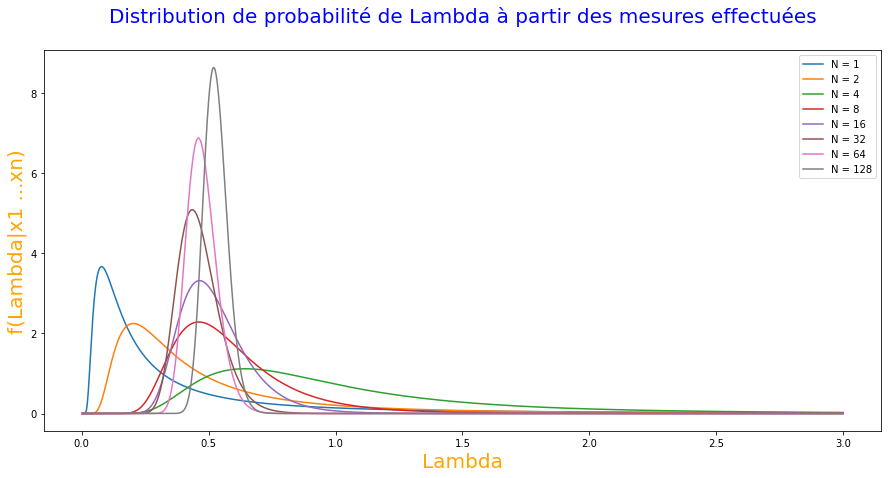

In [32]:
vecteur = np.random.exponential(0.5, 128)

plt.figure(figsize=[15, 7]) 

def ln_vraisemblance(Lambda, vecteur):
    return -len(vecteur) * np.log(Lambda) - np.sum(vecteur) / Lambda

def ln_prior(Lambda): 
    return -np.log(Lambda)

def ln_postérior(Lambda, vecteur):
    ln_vraisemblance(Lambda, vecteur) + ln_postérior (Lambda) 
    
Lambda = np.linspace(0.001, 3, 10000)


for n in [2**i for i in range(8)]:
    log_y = ln_vraisemblance(Lambda, vecteur[:n]) + ln_prior (Lambda)
    y = np.exp(log_y-np.max(log_y)) # on soustrait le max du logy pour limiter les grandes valeurs
    norm = scipy.integrate.simps(y, Lambda)
    plt.plot(Lambda, y/norm, label=f'N = {n}')
    plt.xlabel('Lambda', color='orange', fontsize = 20)
    plt.ylabel('f(Lambda|x1 ...xn)', color='orange', fontsize = 20)
    plt.title('Distribution de probabilité de Lambda à partir des mesures effectuées\n', color='b', fontsize = 20)
plt.legend()
plt.show()



4. Pour chaque cas, en déduire la valeur plus probable de $\lambda_{MV}$ et sa variance $\sigma^2$.


Pour n = 1
Valeur la plus probable de Lambda : 0.4179
Variance de la distribution de Lambda : 0.3543

Pour n = 2
Valeur la plus probable de Lambda : 0.3546
Variance de la distribution de Lambda : 0.1212

Pour n = 4
Valeur la plus probable de Lambda : 0.3168
Variance de la distribution de Lambda : 0.0355

Pour n = 8
Valeur la plus probable de Lambda : 0.5928
Variance de la distribution de Lambda : 0.0519

Pour n = 16
Valeur la plus probable de Lambda : 0.5706
Variance de la distribution de Lambda : 0.0221

Pour n = 32
Valeur la plus probable de Lambda : 0.5745
Variance de la distribution de Lambda : 0.0108

Pour n = 64
Valeur la plus probable de Lambda : 0.4911
Variance de la distribution de Lambda : 0.0038

Pour n = 128
Valeur la plus probable de Lambda : 0.4818
Variance de la distribution de Lambda : 0.0018


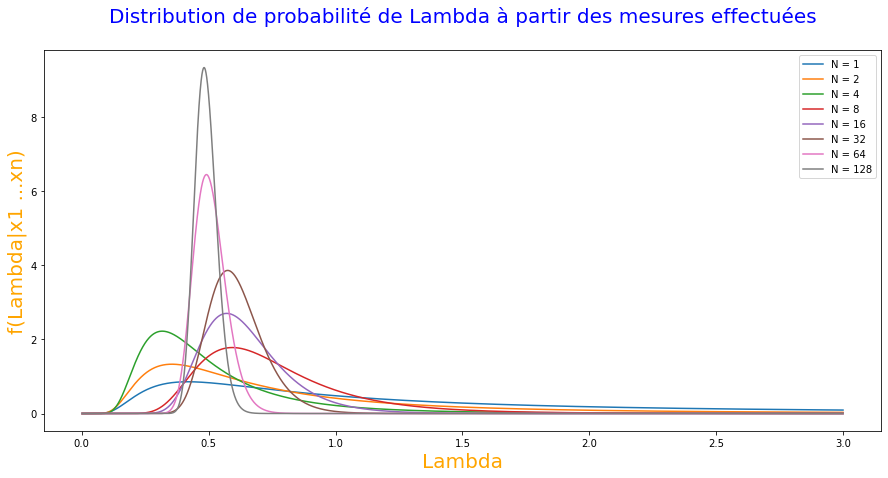

In [35]:
vecteur = np.random.exponential(0.5, 128)

plt.figure(figsize=[15, 7]) 

def ln_vraisemblance(Lambda, vecteur):
    return -len(vecteur) * np.log(Lambda) - np.sum(vecteur) / Lambda

def ln_prior(Lambda): 
    return -np.log(Lambda)

def ln_postérior(Lambda, vecteur):
    ln_vraisemblance(Lambda, vecteur) + ln_postérior (Lambda) 


def gaussian(x, mu, sig):
    return 1./(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)
    
Lambda = np.linspace(0.001, 3, 10000)

for n in [2**i for i in range(8)]:
    log_y = ln_vraisemblance(Lambda, vecteur[:n]) + ln_prior (Lambda)
    y = np.exp(log_y-np.max(log_y)) # on soustrait le max du logy pour limiter les grandes valeurs
    norm = scipy.integrate.simps(y, Lambda)
    plt.plot(Lambda, y/norm, label=f'N = {n}')
    popt,pcov = scipy.optimize.curve_fit(gaussian,Lambda,y/norm)
    plt.xlabel('Lambda', color='orange', fontsize = 20)
    plt.ylabel('f(Lambda|x1 ...xn)', color='orange', fontsize = 20)
    plt.title('Distribution de probabilité de Lambda à partir des mesures effectuées\n', color='b', fontsize = 20)
    print('\nPour n =', n)
    print('Valeur la plus probable de Lambda :',np.round(Lambda[np.argmax(y/norm)],4))
    print('Variance de la distribution de Lambda :', np.round(popt[1]**2,4))

    
plt.legend()


5. En déduire le niveau de confiance associé à l'intervalle $[\lambda_{MV}-\sigma, \lambda_{MV}+\sigma]$.

## Loi gaussienne

On souhaite estimer les paramètres $\mu$ et $\sigma$ d'une loi gaussienne de fonction densité de probabilité :

$$f(x) = \frac{1}{\sqrt{2 \pi} \sigma} \exp \left( - \frac{(x-\mu)^2}{2\sigma^2}\right)$$

à partir d'une série de $N=1000$ mesures ${x_1, x_2,\ldots,x_N}$ avec  $\mu=1$ et $\sigma=2$ , utiliser la bibliothèque `emcee` (https://emcee.readthedocs.io/) pour estimer les lois de distribution associées aux paramètres $\mu$ et $\sigma$. Discuter le choix des priors.

In [13]:
mesures = np.random.normal(1, 2, 1000)

In [14]:
def ln_vraisemblance(paramètres, mesures):
    return -len(mesures) * np.log(paramètres[1]) - .5 * np.sum(np.square(mesures - paramètres[0])/paramètres[1])

In [14]:
#prior = 1 donc ln(prior) = 0
def ln_prior(paramètres):
    return 0  

In [14]:
def ln_posterior(paramètres, mesures):
    return ln_vraisemblance(paramètres, mesures) + ln_prior(paramètres)

In [14]:
import emcee
nombre_chaînes = 10
#Comme on s'occupe de mu et de sigma il faut faire 2 colonnes
p0 = np.random.random(size=(nombre_chaînes, 2))+1
sampler = emcee.EnsembleSampler(nombre_chaînes, 2, ln_posterior, args=[mesures,])
sampler.run_mcmc(p0, 10000)

In [ ]:
samples = sampler.get_chain()
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 8))

ax1.plot(samples[:, :, 0], alpha=0.4)
ax1.set_ylim(0, 2)
ax1.set_xlim(0, len(samples))
ax1.set_ylabel('mu')
ax1.yaxis.set_label_coords(-0.08, 0.5)
ax1.set_xlabel("Nombre de pas")

ax2.plot(samples[:, :, 1], alpha=0.4)
ax2.set_ylim(0, 4)
ax2.set_xlim(0, len(samples))
ax2.set_ylabel('sigma')
ax2.yaxis.set_label_coords(-0.08, 0.5)
ax2.set_xlabel("Nombre de pas")

plt.show()